<a href="https://colab.research.google.com/github/rahatmoktadir03/tumor-scope/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Kaggle credentials from user data
from google.colab import userdata
kaggle_username = userdata.get("KAGGLE_USERNAME")
kaggle_key = userdata.get("KAGGLE_KEY")

# Set environment variables for Kaggle
os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_key

! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 61% 91.0M/149M [00:00<00:00, 951MB/s]
100% 149M/149M [00:00<00:00, 611MB/s] 


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
      label_path = os.path.join(path, label)

      if os.path.isdir(label_path):
        for image in os.listdir(label_path):
            image_path = os.path.join(label_path, image)

            classes.append(label)
            class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0483.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0703.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0789.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_0864.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0183.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0099.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0108.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0988.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0053.jpg,glioma


In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0113.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0169.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0105.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0298.jpg,pituitary
4,/content/Testing/pituitary/Te-piTr_0002.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0093.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0222.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0297.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0034.jpg,glioma


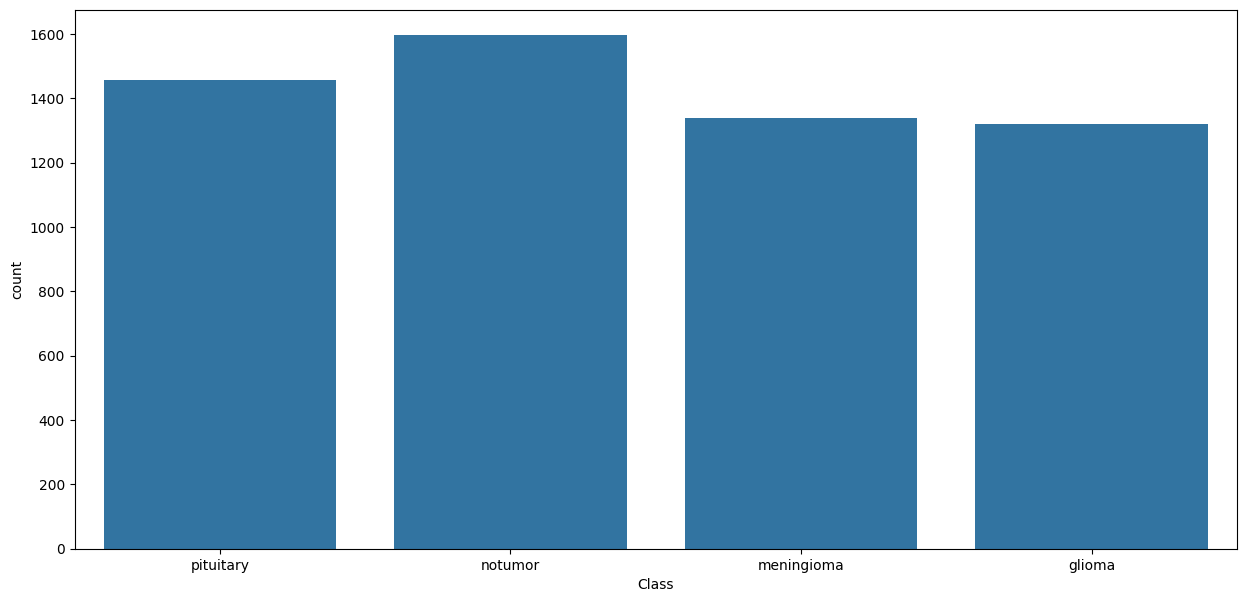

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

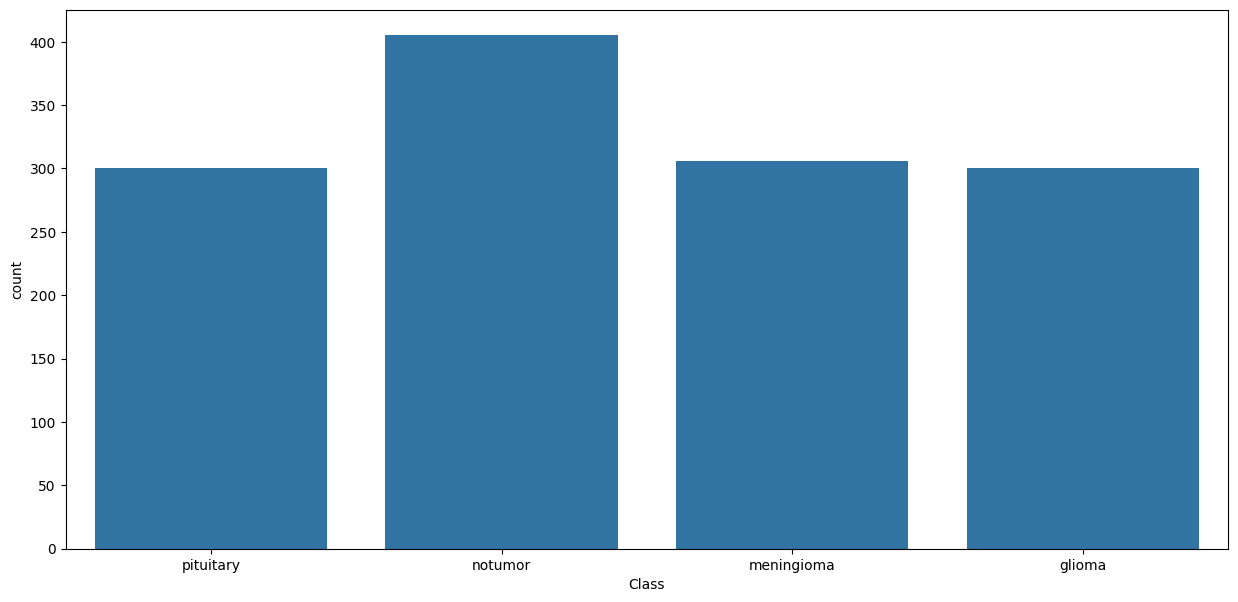

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
1214,/content/Testing/glioma/Te-gl_0072.jpg,glioma
516,/content/Testing/notumor/Te-no_0094.jpg,notumor
1137,/content/Testing/glioma/Te-gl_0122.jpg,glioma
1194,/content/Testing/glioma/Te-gl_0144.jpg,glioma
561,/content/Testing/notumor/Te-no_0210.jpg,notumor
...,...,...
1099,/content/Testing/glioma/Te-gl_0212.jpg,glioma
887,/content/Testing/meningioma/Te-me_0239.jpg,meningioma
956,/content/Testing/meningioma/Te-me_0204.jpg,meningioma
1273,/content/Testing/glioma/Te-gl_0042.jpg,glioma


In [13]:
ts_df

,Class Path,Class
1102,/content/Testing/glioma/Te-gl_0021.jpg,glioma
1203,/content/Testing/glioma/Te-gl_0049.jpg,glioma
187,/content/Testing/pituitary/Te-pi_0045.jpg,pituitary
869,/content/Testing/meningioma/Te-me_0060.jpg,meningioma
560,/content/Testing/notumor/Te-no_0231.jpg,notumor
...,...,...
814,/content/Testing/meningioma/Te-me_0197.jpg,meningioma
903,/content/Testing/meningioma/Te-me_0026.jpg,meningioma
879,/content/Testing/meningioma/Te-me_0242.jpg,meningioma
407,/content/Testing/notumor/Te-no_0394.jpg,notumor


In [14]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [15]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


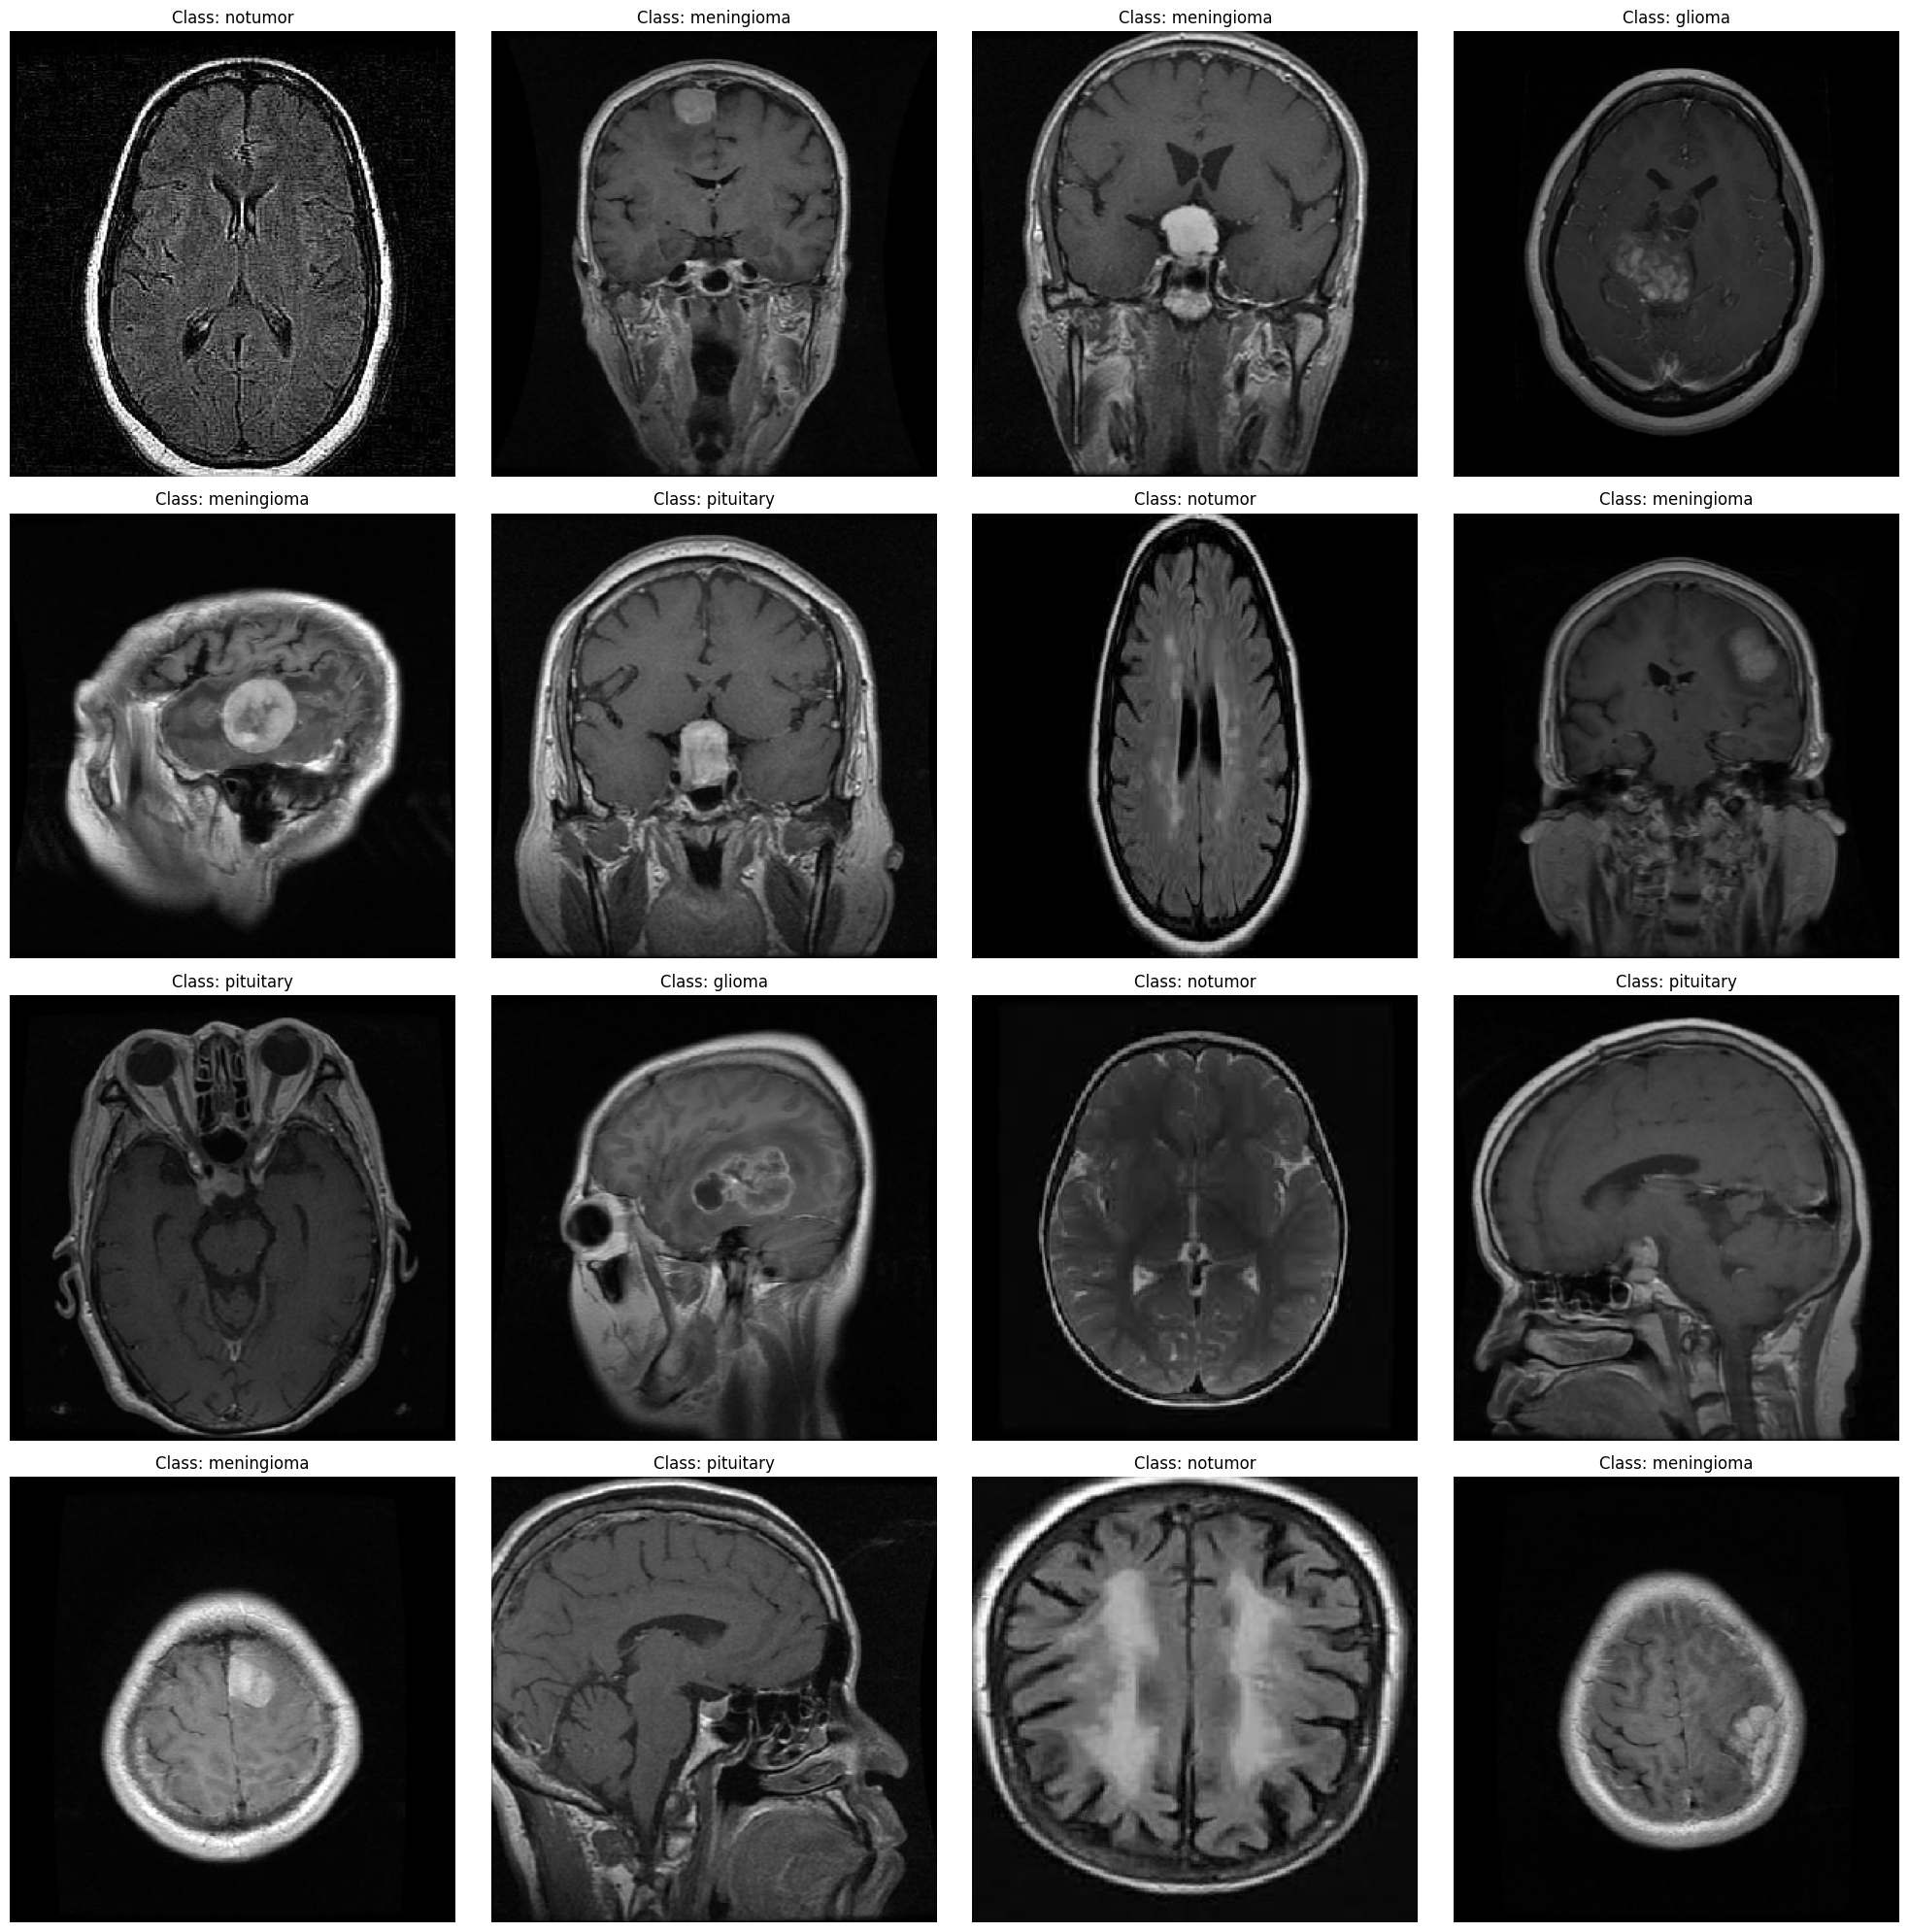

In [16]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    class_index = np.argmax(label)

    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    index_position = class_indices.index(class_index)

    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [17]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top= False,
                                            weights= "imagenet",
                                            input_shape= img_shape,
                                            pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [18]:
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
              Precision(),
              Recall()])


In [19]:
model

<Sequential name=sequential, built=True>

In [20]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.6693 - loss: 0.9174 - precision: 0.8036 - recall: 0.4943 - val_accuracy: 0.9481 - val_loss: 0.1523 - val_precision: 0.9552 - val_recall: 0.9435
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 169s 941ms/step - accuracy: 0.9804 - loss: 0.0668 - precision: 0.9828 - recall: 0.9780 - val_accuracy: 0.9664 - val_loss: 0.0983 - val_precision: 0.9723 - val_recall: 0.9634
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 939ms/step - accuracy: 0.9872 - loss: 0.0387 - precision: 0.9883 - recall: 0.9867 - val_accuracy: 0.9924 - val_loss: 0.0309 - val_precision: 0.9954 - val_recall: 0.9908
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 937ms/step - accuracy: 0.9962 - loss: 0.0142 - precision: 0.9965 - recall: 0.9953 - val_accuracy: 0.9847 - val_loss: 0.0944 - val_precision: 0.9862 - val_recall: 0.9847
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 938ms/step - accuracy: 0.9966 - loss: 0.0104 - precision: 0.9966 - recall: 0.9964 - val_accuracy: 0.9802 - 

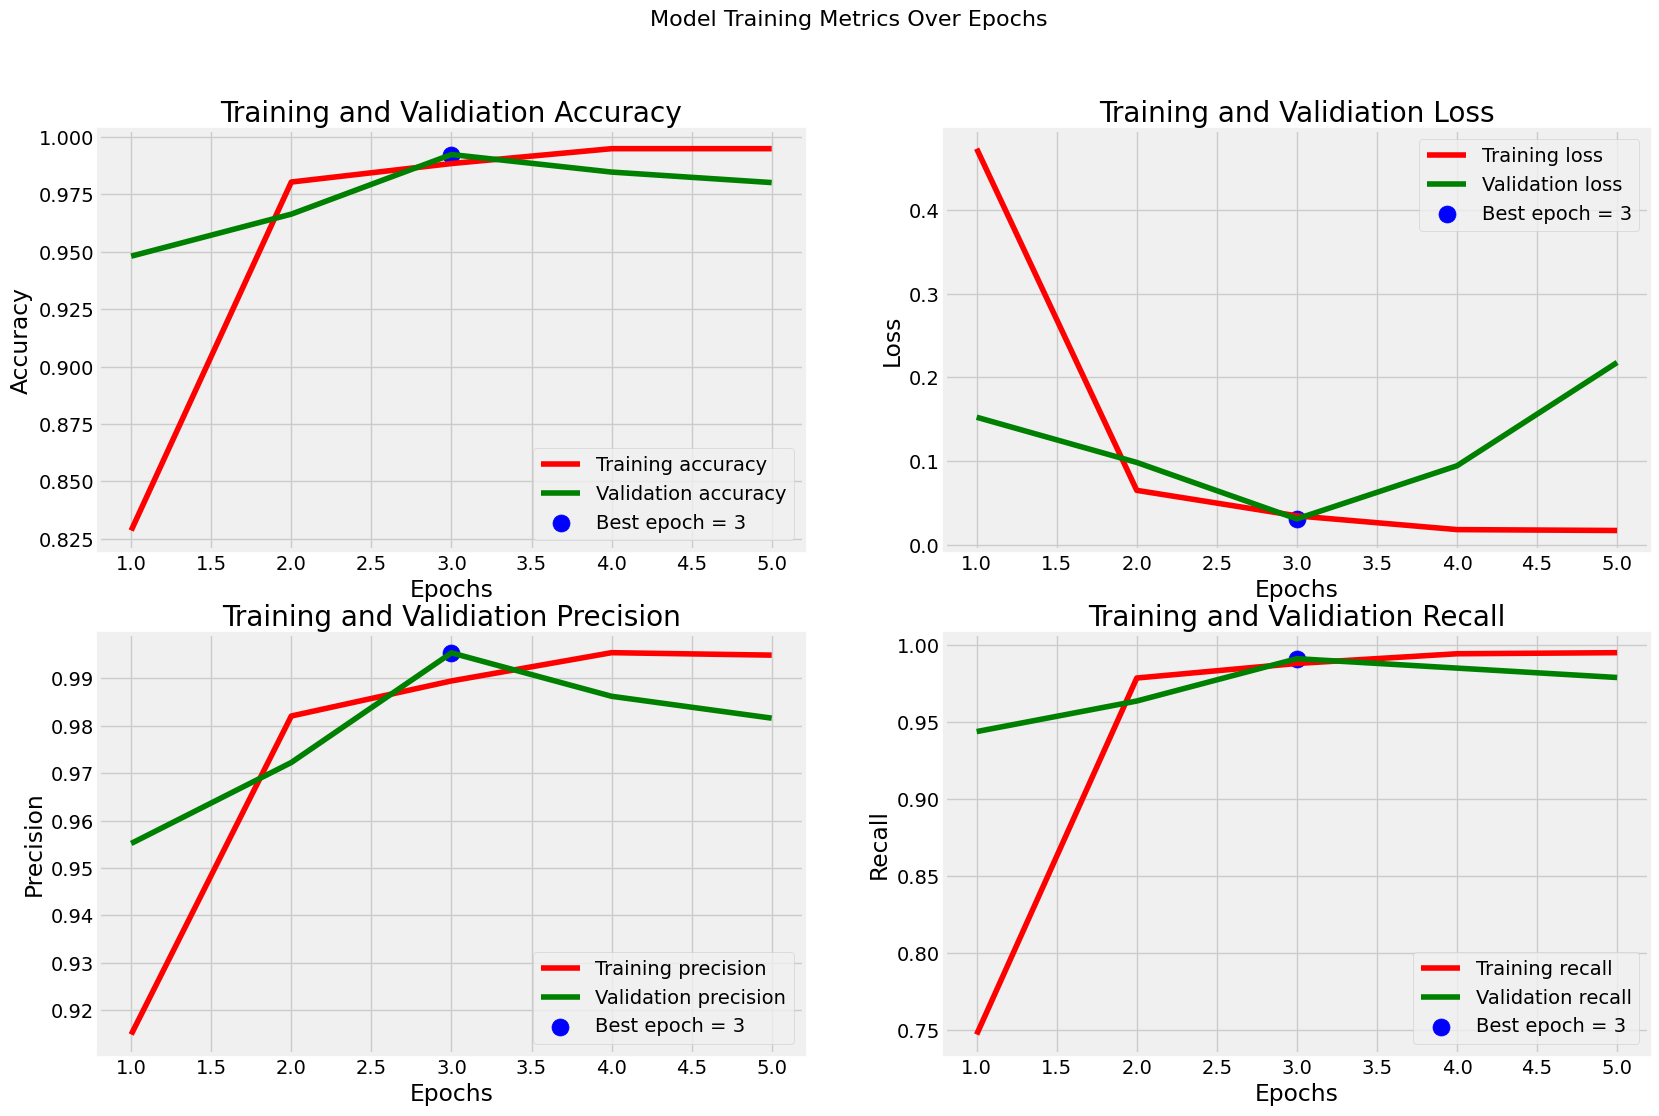

In [21]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validiation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [22]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {train_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 51s 285ms/step - accuracy: 0.9957 - loss: 0.0139 - precision: 0.9957 - recall: 0.9957
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.9820 - loss: 0.1731 - precision: 0.9839 - recall: 0.9806


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9870 - loss: 0.0512 - precision: 0.9870 - recall: 0.9862
Train Accuracy: 99.58%
Train Loss: 0.0201


Validation Accuracy: 99.58%
Validation Loss: 0.2372%


Test Accuracy: 97.56%
Test Loss: 0.0979


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step


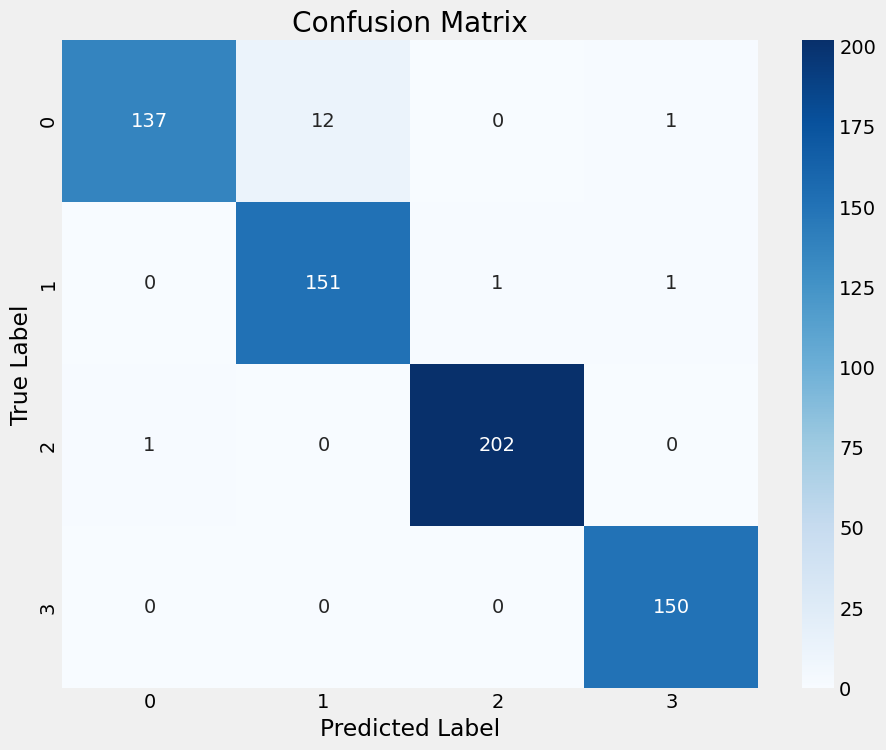

In [23]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from PIL import Image

def predict(img_path: str) -> None:
    labels = list(class_dict.keys())

    plt.figure(figsize=(6, 8))

    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


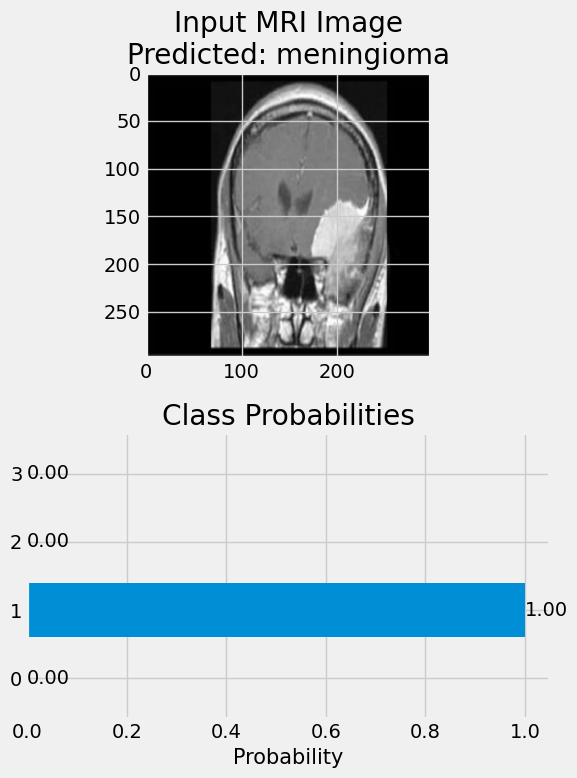


Predicted tumor type: meningioma


In [25]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


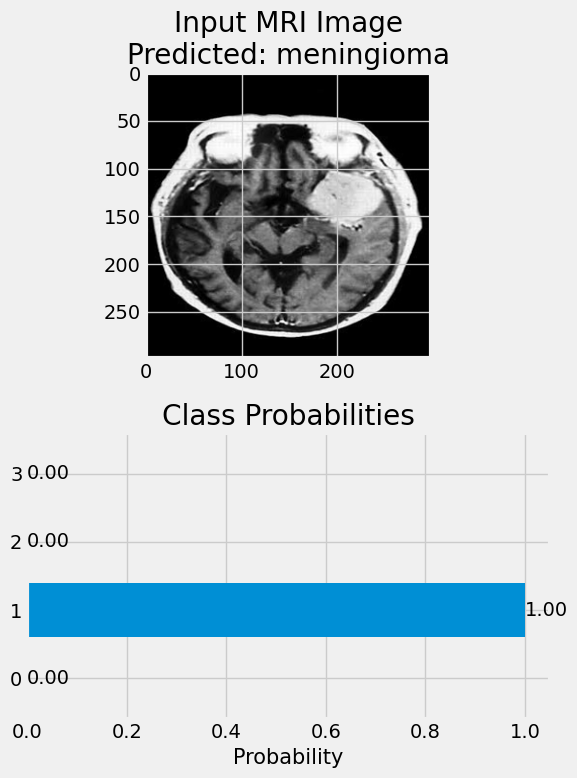


Predicted tumor type: meningioma


In [26]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


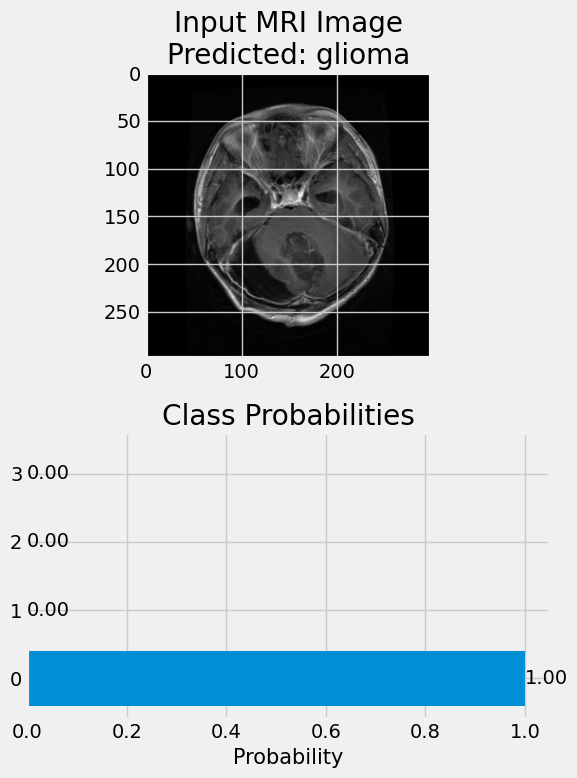


Predicted tumor type: glioma


In [27]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [28]:
model.save_weights("xception_model.weights.h5")

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [30]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [31]:
cnn_model = Sequential()

cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(Adamax(learning_rate= 0.001), loss='categorical_crossentropy', metrics = ['accuracy', Precision(),Recall()])

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 157s 358ms/step - accuracy: 0.5531 - loss: 2.3032 - precision_1: 0.6839 - recall_1: 0.3807 - val_accuracy: 0.7664 - val_loss: 0.8740 - val_precision_1: 0.7990 - val_recall_1: 0.7344
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 113s 315ms/step - accuracy: 0.8190 - loss: 0.7361 - precision_1: 0.8402 - recall_1: 0.7875 - val_accuracy: 0.8244 - val_loss: 0.6480 - val_precision_1: 0.8402 - val_recall_1: 0.8107
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 113s 317ms/step - accuracy: 0.8614 - loss: 0.5252 - precision_1: 0.8758 - recall_1: 0.8463 - val_accuracy: 0.8687 - val_loss: 0.5258 - val_precision_1: 0.8691 - val_recall_1: 0.8412
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 113s 317ms/step - accuracy: 0.8935 - loss: 0.4256 - precision_1: 0.9003 - recall_1: 0.8838 - val_accuracy: 0.8687 - val_loss: 0.4586 - val_precision_1: 0.8752 - val_recall_1: 0.8672
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 114s 318ms/step - accuracy: 0.9022 - loss: 0.3889 - precision_1: 0.9101 - recall_1: 0.8

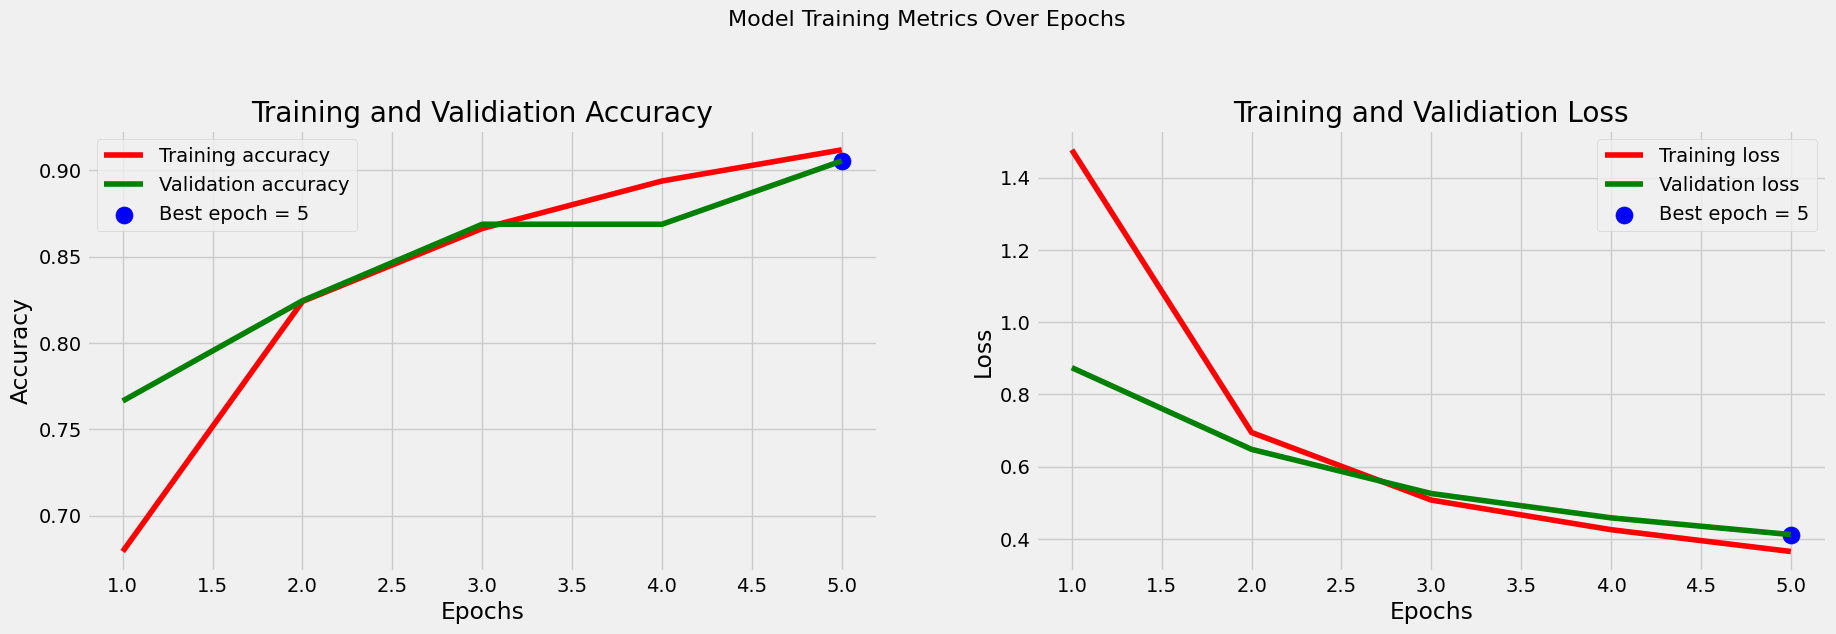

In [33]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: history.history[m] for m in metrics if m in history.history}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics if f'val_{m}' in history.history}

best_epochs = {}
best_values = {}
for m in metrics:
  if f'val_{m}' in history.history:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  if metric in tr_metrics and metric in val_metrics:
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    if metric in best_epochs:
      plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validiation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [34]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {train_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.9618 - loss: 0.2453 - precision_1: 0.9631 - recall_1: 0.9597
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9180 - loss: 0.3845 - precision_1: 0.9174 - recall_1: 0.9115


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9310 - loss: 0.3006 - precision_1: 0.9408 - recall_1: 0.9289
Train Accuracy: 96.17%
Train Loss: 0.2439


Validation Accuracy: 96.17%
Validation Loss: 0.4128%


Test Accuracy: 92.53%
Test Loss: 0.3186


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step


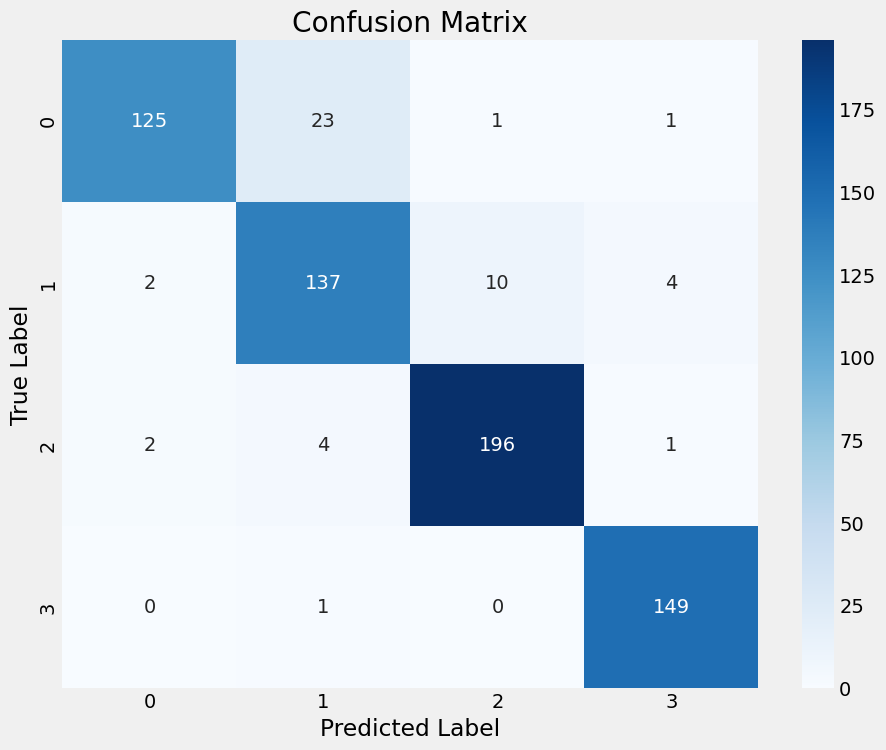

In [35]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [36]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       150
           1       0.83      0.90      0.86       153
           2       0.95      0.97      0.96       203
           3       0.96      0.99      0.98       150

    accuracy                           0.93       656
   macro avg       0.93      0.92      0.92       656
weighted avg       0.93      0.93      0.93       656



In [37]:
cnn_model.save("cnn_model.h5")

In [43]:
%%writefile streamlit_app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from dotenv import load_dotenv
import PIL.Image
import os

# Load environment variables
load_dotenv()
genai.configure(api_key=st.secrets["GOOGLE_API_KEY"])

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']

def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
      - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
      in light cyan, those are the ions where the model is focusing on.
      - Explain possible reasons why the model made the prediction it did.
      - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
      in your explanation.
      - Keep your explanation to 4 sentences max.

      Let's think step by step about this. Verify step by step.
    """
    img = PIL.Image.open(img_path)
    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])
    return response.text

def generate_saliency_map(model, img_array, class_index, img_size, uploaded_file):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()
    gradients = cv2.resize(gradients, img_size)

    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2
    gradients = gradients * mask

    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, img_size)

    original_img = img_array.squeeze() * 255
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    saliency_map_path = os.path.join(output_dir, uploaded_file.name)
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img, saliency_map_path

def load_model_custom(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])
    model.build((None,) + img_shape)
    model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
    model.load_weights(model_path)
    return model

# Streamlit UI
st.title("🧠 Brain Tumor Classification")
st.write("Upload a brain MRI scan to classify and explain using deep learning + Gemini Flash.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file:
    selected_model = st.radio("Select Model", ("Transfer Learning - Xception", "Custom CNN"))

    if selected_model == "Transfer Learning - Xception":
        model = load_model_custom("models/xception_model.weights.h5")
        img_size = (299, 299)
    else:
        model = load_model("models/cnn_model.h5")
        img_size = (224, 224)

    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    saliency_map, saliency_map_path = generate_saliency_map(model, img_array, class_index, img_size, uploaded_file)

    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_column_width=True)

    st.markdown("### 🧪 Classification Results")
    st.markdown(f"""
        <div style="background-color:#000000;padding:30px;border-radius:15px;">
            <div style="display:flex;justify-content:space-between;align-items:center;">
                <div style="flex:1;text-align:center;">
                    <h3 style="color:#ffffff;">Prediction</h3>
                    <p style="font-size:36px;font-weight:800;color:#FF0000;">{result}</p>
                </div>
                <div style="width:2px;height:80px;background-color:#ffffff;"></div>
                <div style="flex:1;text-align:center;">
                    <h3 style="color:#ffffff;">Confidence</h3>
                    <p style="font-size:36px;font-weight:800;color:#2196F3;">{prediction[0][class_index]:.4%}</p>
                </div>
            </div>
        </div>
    """, unsafe_allow_html=True)

    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    ))

    fig.update_layout(
        title='Probabilities for each class',
        xaxis_title='Probability',
        yaxis_title='Class',
        height=400,
        width=600,
        yaxis=dict(autorange="reversed")
    )

    st.plotly_chart(fig)

    st.subheader("💬 Explanation from Gemini Flash")
    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])
    st.write(explanation)


Writing streamlit_app.py


In [45]:
%%writefile requirements.txt
streamlit
tensorflow
numpy
opencv-python
Pillow
plotly
google-generativeai
python-dotenv


Writing requirements.txt
